<a href="https://colab.research.google.com/github/Ashishgupta45/face-emotion-recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statements
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.

### pretrained models
https://www.vlfeat.org/matconvnet/pretrained/

Head-start References
❖ https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de

<img target="_blank" src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/10/face_emotion.png" width=1000; height=500>

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing deep learning libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, Embedding
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from keras.applications.mobilenet import MobileNet, preprocess_input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Ashish Deep Learning /fer2013.csv") 

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
# Total number of Emotion 
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [9]:
#Assigning Names to Emotions in labels
emotion_dict = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad',5: 'suprise', 6: 'neutral'}
width = 48
height = 48
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## Pre trained model

In [ ]:
# working with pre trained model
'''
base_model = MobileNet(input_shape=(224,224,3), include_top= False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation = 'softmax')(x)

#creating our model 
model = Model(base_model.input, x)'''

"\nbase_model = MobileNet(input_shape=(224,224,3), include_top= False)\n\nfor layer in base_model.layers:\n  layer.trainable = False\n\nx = Flatten()(base_model.output)\nx = Dense(units=7, activation = 'softmax')(x)\n\n#creating our model \nmodel = Model(base_model.input, x)"

## Train and Test data sets

In [10]:
X_train = []
y_train = []
X_test = []
y_test = []
k = np.array(list(map(int,df.iloc[0,1].split(" "))),dtype='uint8').reshape((48,48))
for index, row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])

In [11]:
X_train[0]

array(['70', '80', '82', ..., '106', '109', '82'], dtype='<U3')

In [12]:
X_train = np.array(X_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
X_test = np.array(X_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [13]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1), (28709,), (3589, 48, 48, 1), (3589,))

In [15]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

## Preparing our data using data generator

In [16]:
train_datagen = ImageDataGenerator(
    shear_range= 0.2,
    horizontal_flip= True,
    rescale= 1./255,
    rotation_range=10,  
    zoom_range = 0.0,  
    width_shift_range=0.1,  
    height_shift_range=0.1,
    fill_mode = 'nearest'
)

In [17]:
# creating validation datset
val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)

In [18]:
batch_size = 128
train_flow = train_datagen.flow(X_train, y_train, batch_size=batch_size) 
test_flow = val_datagen.flow(X_test, y_test, batch_size=batch_size)

## Visualizing the data that is fed to train datagen

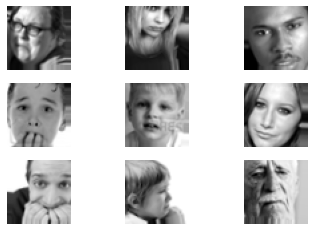

In [19]:
for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        plt.axis('off') 
        plt.subplot(330 + 1 + i) 
        plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
    plt.axis('off') 
    plt.show() 
    break

## having early stopping, model check point, Reduce learning rate

In [20]:
# having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# early stopping 
es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience=15, verbose = 1, mode ='auto')

# model checkpoint
mc = ModelCheckpoint(filepath="best_model.hdf5", monitor = "val_accuracy", verbose = 1, save_best_only=True, mode = "auto")

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto', min_delta=0.0001, min_lr=0.001)

# putting callback in a list
call_back = [es,mc,reduce_lr]

## Creating model for training

In [21]:
import tensorflow.keras.layers as tfl
import tensorflow as tf

def model_(input_shape=(48,48,1)):
  # first input model
    visible = tf.keras.Input(shape=input_shape)

    # Conv Block 1
    conv1 = tfl.Conv2D(64, (3,3), padding='same', input_shape=(48,48,1))(visible)
    bn1 = tfl.BatchNormalization()(conv1)
    rl1 = tfl.ReLU()(bn1)
    mp1 = tfl.MaxPooling2D(pool_size=(2,2))(rl1)
    dp1 = tfl.Dropout(0.25)(mp1)

    # Conv Block 2
    conv2 = tfl.Conv2D(128,(5,5), padding='same')(dp1)
    bn2 = tfl.BatchNormalization()(conv2)
    rl2 = tfl.ReLU()(bn2)
    mp2 = tfl.MaxPooling2D(pool_size=(2,2))(rl2)
    dp2 = tfl.Dropout(0.25)(mp2)

    # Conv Block 3
    conv3 = tfl.Conv2D(512,(3,3), padding='same')(dp2)
    bn3 = tfl.BatchNormalization()(conv3)
    rl3 = tfl.ReLU()(bn3)
    mp3 = tfl.MaxPooling2D(pool_size=(2,2))(rl3)
    dp3 = tfl.Dropout(0.25)(mp3)

    # Conv Block 4
    conv4 = tfl.Conv2D(512,(3,3), padding='same')(dp3)
    bn4 = tfl.BatchNormalization()(conv4)
    rl4 = tfl.ReLU()(bn4)
    mp4 = tfl.MaxPooling2D(pool_size=(2,2))(rl4)
    dp4 = tfl.Dropout(0.25)(mp4)

    #Flatten and output

    flatten = tfl.Flatten(name = 'flatten')(dp4)
    #dn = tfl.Dense(256, activation='relu')(flatten)
    #bn = tfl.BatchNormalization()(dn)
    #dp = tfl.Dropout(0.25)(bn)

    ouput = tfl.Dense(7, activation='softmax')(flatten)

    # create model 
    model = tf.keras.Model(inputs =visible, outputs = ouput)

    # summary layers
    print(model.summary())
    
    return model

In [22]:
model = model_()
for layer in model.layers:
    layer.trainable = True
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0     

In [23]:
batch_size = 128
epochs = 100

history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs,
                    validation_data = test_flow,
                    validation_steps = len(X_test) / batch_size,
                    callbacks = [es,mc,reduce_lr],
                    verbose = 1)

Epoch 1/100
225/224 [==============================] - ETA: 0s - loss: 2.2079 - accuracy: 0.2353
Epoch 00001: val_accuracy improved from -inf to 0.18194, saving model to best_model.hdf5
224/224 [==============================] - 27s 108ms/step - loss: 2.2079 - accuracy: 0.2353 - val_loss: 1.8644 - val_accuracy: 0.1819 - lr: 0.0010
Epoch 2/100
225/224 [==============================] - ETA: 0s - loss: 1.8494 - accuracy: 0.2861
Epoch 00002: val_accuracy improved from 0.18194 to 0.25327, saving model to best_model.hdf5
224/224 [==============================] - 24s 106ms/step - loss: 1.8494 - accuracy: 0.2861 - val_loss: 2.0024 - val_accuracy: 0.2533 - lr: 0.0010
Epoch 3/100
225/224 [==============================] - ETA: 0s - loss: 1.6719 - accuracy: 0.3634
Epoch 00003: val_accuracy improved from 0.25327 to 0.41878, saving model to best_model.hdf5
224/224 [==============================] - 24s 106ms/step - loss: 1.6719 - accuracy: 0.3634 - val_loss: 1.5177 - val_accuracy: 0.4188 - lr: 0.

In [24]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.hdf5")

In [25]:
h =  history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

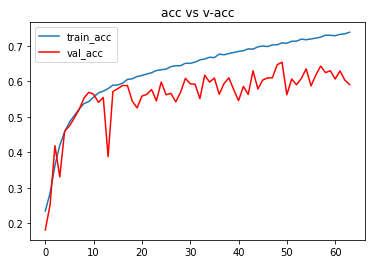

In [28]:
plt.plot(h['accuracy'], label='train_acc')
plt.plot(h['val_accuracy'] , label='val_acc', c = "red")
plt.title("acc vs v-acc")
plt.legend()
plt.show()

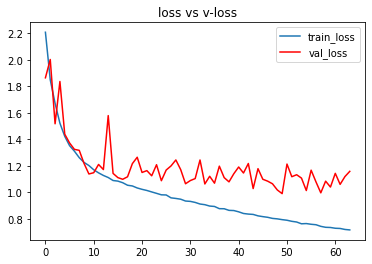

In [30]:
plt.plot(h['loss'], label='train_loss')
plt.plot(h['val_loss'], label='val_loss' , c = "red")
plt.title("loss vs v-loss")
plt.legend()
plt.show()

In [31]:
from keras.models import Model, model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
